In the regression setting, the standard linear model  

$$Y = \beta_0 + \beta_1X_1 + ... + \beta_pX_p + \epsilon$$  

is commonly used to describe the relationship between a response $Y$ and a set of variables $X_1, X_2, ..., X_p$. In this chapter we will discuss some ways in which the simple linear model can be improved, by replacing plain least squares fitting with some alternative fitting procedures.  

Why would we want to use another fitting procedure instead of least squares?  
 1. *Prediction Accuracy*  
  * Provided that the true relationship between the response and the predictors is approximately linear, the least squares estimates will have low bias. If $n\gg p$, then the least squares estimates tend to also have low variance, and will perform well on test observations. However if $n$ is not much larger than $p$, then there can be a lot of variability in the least squares fit, resulting in overfitting and poor predictions on future observations. And if $p > n$, then there is no longer a unique least squares coefficient estimate (The variance is *infinite* so the method cannot be used at all). By *constraining* or *shrinking* the estimated coefficients, we can ofen substantially reduce the variance at the cost of a negligible increase in bias, which can lead to substantial improvements in the accuracy of predictions.  
  <br>
 2. *Model Interpretability*
  * In many cases, some or many of the variables are not actually associated with the response. Including such *irrelevant* variables leads to unnecesary complexity in the resulting model. By removing these variables (setting their coefficients to zero), we can obtain a model that is more easily interpreted. In this case, least squares is extremely unlikely to yield any coefficient estimates that are exactly zero.  
  
In this chapter we discuss three important classes of alternatives to using least squares fit:  

 1. *Subset Selection*  
  * Identify a subset of the $p$ predictors that we believe are related to the response, then fit a model using least squares on the reduced set of variables.  
  <br>
 2. *Shrinkage*  
  * Fit a model with all $p$ predictors but shrink coefficients towards zero relative to the least squares estimates. This shrinkage (a.k.a. *regularization*) has the effect of reducing variance. Depending on what type of shrinkage is performed, some of the coefficients may be estimated to be exactly zero. Hence, shrinkage methods can also perform variable selection.  
  <br>
 3. *Dimension Reduction*  
  * This approach involves *projecting* the $p$ predictors into a $M$-dimensional space, where $M<p$. This is achieved by computing $M$ different *linear combinations* or *projections* of the variables. Then these $M$ projections are used as predictors to fit a linear regression model by least squares.  
  


# Subset Selection

## Best Subset Selection  
To perform *best subset selection* we fit a separate least squares regression for each possible combination of the $p$ predictors and then identify which one is the *best*. The problem of selecting the *best model* from the $2^p$ possibilities considered by best subset selection is not trivial. This is usually broken up into two stages, as in Algorithm 6.1.  

---
**Algorithm 6.1**: *Best subset selection*  

  1. Let $M_0$ denote the *null model*, which contains no predictors. This model simply predicts the sample mean for each observation.  
  <br>
  2. For $k=1, 2, ..., p$:  
    a. Fit all $\bigl(_k^p\bigr)$ models that contain exactly $k$ predictions  
    b. Pick the best among these $\bigl(_k^p\bigr)$ models and call it $M_k$. Here *best* is defined as having the smallest RSS, or equivalently largest $R^2$.  
  <br>
  3. Select a single best model from among $M_0, ..., M_p$ using cross validated prediction error, $C_p$ (AIC), BIC, or adjusted $R^2$.

---  

In Algorithm 6.1, step 2 identifies the best model for each subset size (on the training data) which reduces the problem from one of $2^p$ possible models to one of $p+1$ possible models.  

Now in order to select a single best model, we must simple choose among these $p+1$ options. However, since RSS decreases monotonically and $R^2$ increases monotonically as the number of features increases, we will always end up with a model involving all the variables. The problem is that a low RSS and a high $R^2$ indicates a model with a low *training* error, whereas we wish to choose a model that has a low *test* error. Therefore, in step 3, we us cross-validated prediction error, $C_p$, BIC, or adjusted $R^2$ in order to select among $M_0, M_1, ..., M_p$.  

In the case of logistic regression, *deviance* plays the role of RSS in step 2 for selecting the best model. Deviance is negative two times the maximized log-likelihood. The smaller the deviance, the better the fit.  

While best subset selection is simple and conceptually appealing, it suffers from computational limitations. If $p=10$ there are approximately 1,000 possible models. If $p=20$ there are over one million possibilities. Best subset becomes computationally infeasible around $p=40$, even with extremely fast modern computers.  

## Stepwise Selection  
Best subset selection cannot be applied with very large $p$. Best subset selection may also suffer from statistical problems when $p$ is large. The larger the search space, the higher the chance of finding models that look good on training data, even though they might not have any predictive power on future data. Thus, an enourmous search space can lead to overfitting and high variance of the coefficient estimates.  

*Stepwise* methods explore a far more restricted set of models.

### Forward Stepwise Selection  
*Forward stepwise selection* begins with a model containing no predictors, and then adds predictors to the model that gives the greatest *additional* improvement, one-at-a-time until all predictors are in the model.  

---
**Algorithm 6.2**: *Forward stepwise selection  

  1. Let $M_0$ denote the *null* model, which contains no predictors.  
  <br>
  2. For $k=0, ..., p-1$:  
    a. Consider all $p-k$ models that augment the predictors in $M_k$ with one additional predictor.  
    b. Choose the *best* among these $p-k$ models, and call it $M_{k+1}$. Here *best* is defined as having the smallest RSS or highest $R^2$.  
  <br>
  3. Select a single best model from among $M_0, ..., M_p$ using cross validated prediction error, $C_p$ (AIC), BIC, or adjusted $R^2$  
  
---  

Forward stepwise selection involves fitting $1 + \sum_{k=0}^{p-1}(p-k) = 1 + p(p+1)/2$ instead of $2^p$ models for best subset selection. When $p=20$, best subset selection requires fitting 1,048,576 models, wheras forward stepwise selection requires fitting only 211 models!  

While forward stepwise selection's computational advantages are clear, it is not guaranteed to find the best possible model out of all $2^p$ possible models. Consider a data set with $p=3$ predictors; the best possible one-variable model icludes $X_1$ and the best possible two-variable model contains $X_2$ and $X_3$. Forward selection will fail to select the best possible two-variable model, because $M_1$ will contain $X_1$, so $M_2$ must contain $X_1$ as well.  

Forward stepwise selection can be applied to high-dimensional data sets (e.g. $n<p$), however it is only possible to construct submodels $M_0, M_{n-1}$ since least squares will not yield a unique solution if $p \ge n$.

### Backward Stepwise Selection  
Unlike forward stepwise selection, backward stepwise selection begins with the full least squares model containing all $p$ predictors, and then iteratively removes the least useful predictor one-at-a-time.  

---  
**Algorithm 6.3**: *Backward Stepwise Selection*  

  1. Let $M_p$ denote the *full* model, which contains all $p$ predictors.  
  <br>
  2. For $k = p, p-1, ..., 1$:  
    a. Consider all $k$ models that contain all but one of the predictors in $M_k$, for a total of $k-1$ predictors.  
    b. Choose the *best* among these $k$ models, and call it $M_{k-1}$. here *best* is defined as having smallest RSS or highest $R^2$.  
  <br>
  3. Select a single best model from among $M_0, ..., M_p$ using cross validated prediction error, $C_p$ (AIC), BIC, or adjusted $R^2$.  
  
---  

Backward stepwise selection searches through $1+p(p-1)/2$ models as in forward selection so it can be applied when $p$ is too large to apply best subset selection. Also like forward stepwise selection, backward stepwise selection is not guaranteed to yield the *best* model containing a subset of the $p$ predictors.  

Backward selection requires that the number of samples $n$ is larger than the number of variables $p$ (so that the full model can be fit). In contrast, forward selection can be used even when $n<p$, and so is the only viable subset method when $p$ is very large.  

### Hybrid Approaches  
Hybrid versions of forward and backward stepwise selection are available, in which variables are added to the model sequentially, in analogy to forward selection. However, after adding each new variable, the method may also remove any variables that no longer provide an improvement in the model fit. Such an approach attempts to more closely mimic best sub- set selection while retaining the computational advantages of forward and backward stepwise selection

## Choosing the Optimal Model  
Since the model containing all $p$ predictors will always have the smallest RSS and the largest $R^2$ (since they are related to *training* error), we need to select the best model with respect to *test* error. There are two common approaches:  

  1. We can indirectly estimate the test error by making an *adjustment* to the training error to account for the bias due to overfitting.  
  
  2. We can *directly* estimate the test error, using either a validation set approach or a cross-validation approach. 

### $C_p$, AIC, BIC, and Adjusted $R^2$  
The training set MSE is generally an underestimate of the test MSE (recall MSE = RSS/$n$) because when we fit a model to the training data using least squares, we specifically estimate the regression coefficients such that the training RSS (but not the test RSS) is minimized. In particular, the training error will decrease as more variables are included in the model but the test error may not. Therefore, training set RSS and training set $R^2$ cannot be used to select from among the set of models with a different number of variables.  

A number of techniques for *adjusting* the training error for the model size are available. These approaches can be used to select among a set of models with different number of variables.  

For a fitted least squares model containing $d$ predictors, the $C_p$ estimate of the test MSE is computed using the equation  

$$C_p=\frac{1}{n}(RSS+2d\widehat{\sigma}^2)$$  

where $\widehat{\sigma}^2$ is an estimate of the variance of the error $\epsilon$ associated with each response measurement. Typically $\widehat{\sigma}^2$ is estimated using the full model containing all predictors. Essentially, the $C_p$ statistic adds a penalty of $2d\widehat{\sigma}^2$ to the training RSS in order to adjust for the fact that the training error tends to underestimate the test error. The penalty increases as the number of predictors in the model increases, which is intended to adjust for the corresponding decrease in RSS. It can be shown that if $\widehat{\sigma}^2$ is an unbiased estimator of $\sigma^2$, then $C_p$ is an unbiased estimate of test MSE.  

The *Akaike information criterion* (AIC) is defined for a large class of models fit by maximum likelihood. In the case of linear regression with Gaussian errors, maximum likelihood and least squares are the same thing. In this case AIC is given by  

$$AIC=\frac{1}{n\widehat{\sigma}^2}(RSS + 2d\widehat{\sigma}^2)$$  

where, for simplicity, an additive constant has been omitted. For least squares, $C_p$ and AIC are proportional to each other.  

The *Bayesian information criterion* is derived from a Bayesian point of view, but looks similar to $C_p$ and AIC. For the least squares model with $d$ predictors, the BIC is, up to irrelevant constants, given by  

$$BIC = \frac{1}{n\widehat{\sigma}^2}(RSS + \text{log}(n)d\widehat{\sigma}^2)$$  

Notice that BIC replaces the $2d\widehat{\sigma}^2$ with a $\text{log}(n)d\widehat{\sigma}^2$. Since $\text{log}(n) > 2$ for any $n>7$, the BIC statistic generally places a heavier penalty on models with many variables, and hence results in the selection of smaller models than $C_p$.  

The adjusted $R^2$ statistic is another popular approach for selecting among a set of models that contain different numbers of variables. The usual $R^2$ is defined as $1-RSS/TSS$ where $TSS=\sum(y_i-\bar{y})^2$ is the *total sum of squares* for the response. Since RSS always decreases as more variables are added to the model, the $R^2$ always increases as more variables are added. For a least squares model with $d$ variables, the adjusted $R^2$ statistic is calculated as  

$$\text{Adjusted }R^2=1-\frac{RSS/(n-d-1)}{TSS/(n-1)}$$  

Unlike $C_p$, AIC, and BIC, for which a small value indicates a model with low test error, a large value of adjusted $R^2$ indicates a model with a small test error. Maximizing the adjusted $R^2$ is equivalent to minimizing $\frac{RSS}{n-d-1}$, which may increase or decrease as the number of variables in the model increases, due to the presence of $d$ in the denominator.  

The intuition is that once all of the correct variables have been included in the model, adding additional *noise* variables will lead to only a very small decrease in RSS. However, adding noise variables leads to an increase in $d$, which will lead to an increase in $\frac{RSS}{n-d-1}$, and consequently a decrease in the adjusted $R^2$. Unlike the $R^2$ statistic, the adjusted $R^2$ statistic *pays a price* for the inclusion of unnecessary variables in the model.

### Validation and Cross-Validation  
We can also directly estimate the test error using the validation set and cross-validation methods. We can compute the validation set error or the cross-validation error for each model under consideration, and then select the model for which the resulting estimated test error is smalles. This has an advantage relative to $C_p$, AIC, BIC, and adjusted $R^2$, in that it provides a direct estimate of test error and makes less assumptions about the true underlying model. It can also be used in a wider range of model selection tasks, even in cases where it is hard to pinpoint the model degrees of freedom or hard to estimate the error variance $\sigma^2$.  

Because the estimated test error of models which include an increasing number of variables are quite similar, we can select a model using the *one-standard-error rule*. We first calculate the standard error of the estimated test MSE for each model size, and then select the smallest model for which the estimated test error is within one standard error of the lowest point on the curve. The rationale is that if a set of models appear to be more or less equally qood, then we might as well choose the simplest method (least number of predictors).  

# Shrinkage Methods  
As an alternative to fitting a linear model with least squares, we can fit a model containing all $p$ predictors using a technique that *constrains* or *regularizes* the coefficient estimates, ore equivalently, that *shrinks* the coefficients towards zero. It turns out that shrinking the coefficient estimates can significantly reduce their variance. The best-known techniques for shrinking the regression coefficients towards zero are *ridge regression * and the *lasso*.  

## Ridge Regression  
The least squares fitting procedure estimates $\beta_0, \beta_1, ..., \beta_p$ using the values that minimize  

$$RSS=\sum_{i=1}^n\biggl(y_i - \beta_0 -\sum_{j=1}^p\beta_jx_{ij}\biggr)^2$$  

*Ridge Regression* is very similar to least squares, except that the coefficients are estimated by minimizing a slightly different quantitiy. In particular, the ridge regression coefficient estimates $\widehat{\beta}^R$ are the values that minimize  

$$\sum_{i=1}^n\biggl(y_i-\beta_0-\sum_{j=1}^p\beta_jx_{ij}\biggr)^2 + \lambda\sum_{j=1}^p\beta_j^2=RSS+\lambda\sum_{j=1}^p\beta_j^2$$  

where $\lambda \ge 0$ is a *tuning parameter*, to be determined separately. As with least squares, ridge regression seeks coefficient estimates that fit the data well, by making the RSS small. However, the second term $\lambda\sum_j\beta_j^2$, called the *shrinkage penalty*, is small when $\beta_1, ..., \beta_p$ are close to zero, and so it has the effect of *shrinking* the estimates of $\beta_j$ towards zero. $\lambda$ serves to control the relative impact of these two terms on the regression coefficient estimates. When $\lambda=0$, the penalty term has no effect, and ridge regression will produce the least squares estimates. However, as $\lambda \to \infty$, the impact of the shrinkage penalty grows, and the ridge regression coefficient estimates will approach zero. Ridge regression will produce a different set of coefficient estimates, $\widehat{\beta}_{\lambda}^R$, for each value of $\lambda$.  

Notice that the shrinkage penalty is applied to $\beta_1, ..., \beta_p$ but not to the intercept $\beta_0$. We want to shrink the estimated association of each variable with the response; however, we do not want to shrink the intercept, which is simply a measure of the mean value of the response when $x_{i1}=x_{i2}=...=x_{ip}=0$. If we assume that the variables have been centered to have mean zero before ridge regression is performed, then the estimated intercept will take the form $\beta_0=\bar{y}=\sum_{i=1}^ny_i/n$.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline

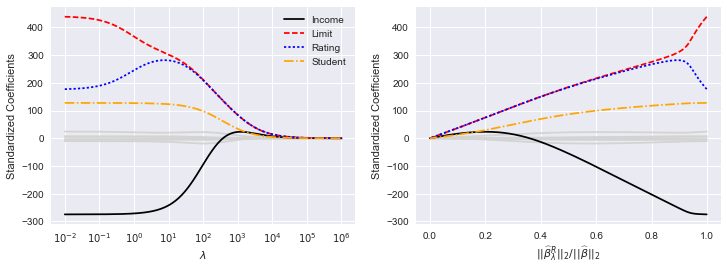

In [2]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
#read the data
credit = pd.read_csv('../../data/Credit.csv', index_col=0)
#create dummy variables
credit = pd.get_dummies(credit, drop_first=True)
#get a list of features (predictors)
features = credit.columns.drop('Balance')
#scale all of the predictors
sc = StandardScaler()
credit[features] = sc.fit_transform(credit[features])
#get X and y arrays for fitting models
X = credit[features].values
y = credit['Balance'].values
#get the least squares regression coefficients
lr = LinearRegression()
lr.fit(X, y)
lr_coefs = lr.coef_
#create an array for alpha
alpha = np.logspace(-2, 6, 1000)
#create an instance of the ridge regression
ridge = Ridge()
#create a list to store the coefficients for each iteration
coefs = []
#iterate over alpha and get the ridge regression coefficient estimates
for a in alpha:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
coefs = np.array(coefs)
#calculate the l2 norms of the ridge regression coefficient estimates
l2_norms = np.sqrt((coefs**2).sum(axis=1))/np.sqrt((lr_coefs**2).sum())

#now make the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
for i in range(len(features)):
    if features[i] == 'Income':
        ax1.semilogx(alpha, coefs[:, i], '-k', label='Income')
        ax2.plot(l2_norms, coefs[:, i], '-k', label='Income')
    elif features[i] == 'Limit':
        ax1.semilogx(alpha, coefs[:, i], '--r', label='Limit')
        ax2.plot(l2_norms, coefs[:, i], '--r', label='Limit')
    elif features[i] == 'Rating':
        ax1.semilogx(alpha, coefs[:, i], linestyle='dotted', color='blue', label='Rating')
        ax2.plot(l2_norms, coefs[:, i], linestyle='dotted', color='blue', label='Rating')
    elif features[i] == 'Student_Yes':
        ax1.semilogx(alpha, coefs[:, i], '-.', color='orange', label='Student')
        ax2.plot(l2_norms, coefs[:, i], '-.', color='orange', label='Student')
    else:
        ax1.semilogx(alpha, coefs[:, i], color='lightgray', zorder=1)
        ax2.plot(l2_norms, coefs[:, i], color='lightgray', zorder=1)
        
ax1.legend()
ax1.set(xlabel=r'$\lambda$', ylabel='Standardized Coefficients')
ax2.set(xlabel=r'$||\widehat{\beta}_{\lambda}^R||_2/||\widehat{\beta}||_2$',
        ylabel='Standardized Coefficients');

### An Application to the Credit Data
In the above figure, the ridge regression coefficient estimates for the credit data are displayed. The left-panel shows how the coefficient estimates shrink towards zero as $\lambda$ increases. Although the ridge coefficient estimates tend to decrease in aggregate as $\lambda$ increases, individual coefficients may occasionally increase as $\lambda$ increases.  

The right-panel displays the same ridge coefficient estimates as the left-hand panel, but are displayed with $\frac{||\widehat{\beta}_{\lambda}^R||_2}{||\widehat{\beta}||_2}$ on the $x$-axis. $\widehat{\beta}$ denotes the vecor of least squares coefficient estimates. The notation $||\beta||_2$ denotes the *$\ell_2$ norm* of a vector and is defined as $||\beta||_2 = \sqrt{\sum_{j=1}^p\beta_j^2}$. It measures the distance of $\beta$ from zero. As $\lambda$ increases, the $\ell_2$ norm of $\widehat{\beta}_{\lambda}^R$ will *always* decrease, and so will $\frac{||\widehat{\beta}_{\lambda}^R||_2}{||\widehat{\beta}||_2}$. The latter quantity ranges from 1 (when $\lambda=0$, in which case the ridge regression coefficient estimate is the same as the least squares estimate, and so their $\ell_2$ norms are the same) to 0 (when $\lambda=\infty$, in which case the ridge regression coefficient estimate is a vector of zeros, with $\ell_2$ norm equal to zero). Thus, we can think of the $x$-axis of the right-hand panel of the figure above as the amount that the ridge regression coefficient estimates have been shrunken towards zero. A small value indicates that they have been shrunken very close to zero.  

The standard least squares coefficient estimates are *scale equivalent*: multiplying $X_j$ by a constant $c$ simply leads to a scaling of the least squares coefficient estimates by a factor of $1/c$. In other words, regardless of how the $j$th predictor is scaled, $X_j\widehat{\beta}_j$ will remain the same. In contrast, the ridge regression coefficient estimates can change *substantially* when multiplying a given predictor by a constant. In other words, $X_j\widehat{\beta}_{j, \lambda}^R$ will depent not only on the value of $\lambda$, but also on the scaling of the $j$th predictor. In fact, the value of $X_j\widehat{\beta}_{j, \lambda}^R$ may even depend on the scaling of the *other* predictors! Therefore, it is best to apply ridge regression after *standardizing the predictors*, using the formula  

$$\tilde{x}_{ij} = \frac{x_{ij}}{\sqrt{\frac{1}{n}\sum_{i=1}^n(x_{ij}-\bar{x}_j)^2}}$$  

So that they are all on the same scale. The denominator is the estimated standard deviation of the $j$th predictor. Consequently, all of the standardized predictors will have a standard deviation of one. As a result, the final fit will not depend on the scal on which the predictors are measured.

### Why Does Ridge Regression Improve Over Least Squares?  
Ridge regression's advantage over least quares is rooted in the *bias-variance trade-off*. As $\lambda$ increases, the flexibility of the ridge regression fit decreases, leading to decreased variance but increased bias. with $\lambda=0$ the variance is high but there is no bias. As $\lambda$ increases, the shrinkage of the ridge coefficient estimates leads to a substantial reduction in the variance of the predictions, at the expense of a slight increase in bias. Beyond a certain threshold for increasing $\lambda$, the decrease in variance slows and the shrinkage on the coefficients causes them to be significantly underestimated, resulting in a large increase in bias.  

In general, when the number of variables $p$ is almost as large as the number of observations $n$, the least squares estimate will be highly variable (any change in the training data can cause a large change in the least squares coefficient estimates). If $p>n$, then the least squares estimates do not even have a unique solution, whereas ridge regression can still perform well by trading off a small increase in bias for a large decrease in variance. Hence, ridge regression works best in situations where the least squares estimates have high variance.  

There is also a computational advantage to ridge regression over best subset selection, which requires $2^p$ models. Even for moderate values of $p$ best subset selection can be computationally infeasible. In contrast, for any fixed value of $\lambda$, ridge regression only fits a single model, and the model-fitting procedure can be performed quite quickly. 

## The Lasso
Ridge regression does have one obvious disadvantage. The penalty term $\lambda\sum\beta_j^2$, will shrink all of the coefficients towards zero, but will not set any of them exactly to zero (unless $\lambda=\infty$. This may not be a problem for prediction accuracy, but it can create a challenge in model interpretation when $p$ is large. Ridge regression will always generate a model involving all ten predictors. Increasing the value of $\lambda$ will tend to reduce the magnitudes of the coefficients, but won't result in exclusion of any variables.  

The *lasso* is a relatively recent alternative to ridge regression that overcomes this disadvantage. The lasso coefficients, $\widehat{\beta}_{\lambda}^L$, minimize the quantity  

$$\sum_{i=1}^n\biggl(y_i-\beta_0-\sum_{j=1}^p\beta_jx_{ij}\biggr)^2 + \lambda\sum_{j=1}^p|\beta_j| = RSS + \lambda\sum_{j=1}^p\lvert\beta_j\rvert$$  

Unlinke ridge regression, which uses an $\ell_2$ penalty, the lasso uses an $\ell_1$ penalty. The $\ell_1$ norm of a coefficient vector $\beta$ is given by $\lvert\lvert\beta\rvert\rvert_1=\sum\lvert\beta_j\rvert$.  

As in ridge regression, the lasso shrinks the coefficient estimates towards zero. however, in the case of the lasso, the $\ell_1$ penalty has the effect of forcing some of the coefficient estimates to be exactly equal to zero when $\lambda$ is sufficiently large. Hence, much like best subset selection, the lasso performs $variable selection$. Models generated from the lasso are generally much easier to interpret than ridge regression. We say that the lasso yeilds *sparse* models - that is, models that involve only a subset of variables. As in ridge regression, selecting a good value of $\lambda$ for the lasso is critical.  



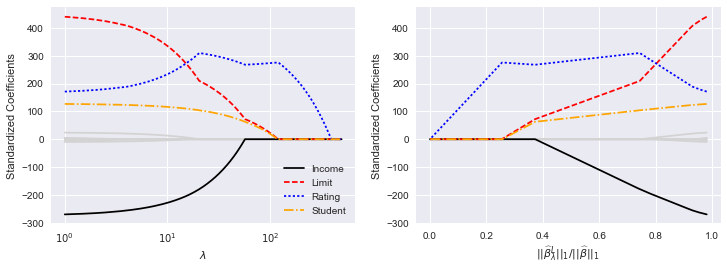

In [3]:
from sklearn.linear_model import Lasso

credit = pd.read_csv('../../data/Credit.csv', index_col=0)
credit = pd.get_dummies(credit, drop_first=True)
features = credit.columns.drop('Balance')
sc = StandardScaler()
credit[features] = sc.fit_transform(credit[features])

X = credit[features].values
y = credit['Balance'].values

lr = LinearRegression()
lr.fit(X, y)
lr_coefs = lr.coef_

alpha = np.linspace(1, 500, 1000)
lasso = Lasso()
coefs = []
for a in alpha:
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)
coefs = np.array(coefs)

l1_norms = (abs(coefs)).sum(axis=1)/(abs(lr_coefs)).sum()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
for i in range(len(features)):
    if features[i] == 'Income':
        ax1.semilogx(alpha, coefs[:, i], '-k', label='Income')
        ax2.plot(l1_norms, coefs[:, i], '-k', label='Income')
    elif features[i] == 'Limit':
        ax1.semilogx(alpha, coefs[:, i], '--r', label='Limit')
        ax2.plot(l1_norms, coefs[:, i], '--r', label='Limit')
    elif features[i] == 'Rating':
        ax1.semilogx(alpha, coefs[:, i], linestyle='dotted', color='blue', label='Rating')
        ax2.plot(l1_norms, coefs[:, i], linestyle='dotted', color='blue', label='Rating')
    elif features[i] == 'Student_Yes':
        ax1.semilogx(alpha, coefs[:, i], '-.', color='orange', label='Student')
        ax2.plot(l1_norms, coefs[:, i], '-.', color='orange', label='Student')
    else:
        ax1.semilogx(alpha, coefs[:, i], color='lightgray', zorder=1)
        ax2.plot(l1_norms, coefs[:, i], color='lightgray', zorder=1)
        
ax1.legend()
ax1.set(xlabel=r'$\lambda$', ylabel='Standardized Coefficients')
ax2.set(xlabel=r'$||\widehat{\beta}_{\lambda}^L||_1/||\widehat{\beta}||_1$',
        ylabel='Standardized Coefficients');

When $\lambda=0$, the lasso simply gives the least squares fit, and when $\lambda$ becomes sufficiently large, the lasso gives the null model in which all coefficients estimates equal zero. In between these two extremes, the ridge regression and lasso models are quite different. Moving from left to right in the right-hand panel of the figure above, we observe that at first the lasso results in a model that contains only the rating predictor. Then student and limit enter the model simultaneously, shortly followed by income. Eventually, the remaining variables enter the model. Hence, depending on the value of $\lambda$, the lasso can produce a model involving any number of variables, while ridge regression will always include all of the variables in the model (although the magnitude of the coefficient estimates will depend on $\lambd$).  

### Another Formulation for Ridge Regression and the Lasso
One can show that the lasso and ridge regression coefficient estimates solve the problems  

$$^{\text{minimize}}_{\beta}\biggl\{\sum_{i=1}^n\biggl(y_i - \beta_0-\sum_{j=1}^p\beta_jx_{ij}\biggr)^2\biggr\}\qquad\text{ subject to}\qquad\sum_{j=1}^p\lvert\beta_j\rvert\le s$$

and

$$^{\text{minimize}}_{\beta}\biggl\{\sum_{i=1}^n\biggl(y_i - \beta_0-\sum_{j=1}^p\beta_jx_{ij}\biggr)^2\biggr\}\qquad\text{ subject to}\qquad\sum_{j=1}^p\beta_j^2\le s$$

respectively. In other words, for every value of $\lambda$, there is some $s$ such that this lasso equation and the lasso equation from earlier will give the same lasso coefficient estimates. Similarly, for every value of $\lambda$ there is a corresponding $s$ such that this ridge regression equation and the ridge regression equation from earlier will give the same ridge regression coefficient estimates. When $p=2$ then the lasso equation above indicates that the lasso coefficient estimates have the smallest RSS out of all points that lie within the diamond defined by $\lvert\beta_1\rvert + \lvert\beta_2\rvert\le s$. Similarly, the ridge regression estimates have the smallest RSS out of all points that lie within the circle defined by $\beta_1^2+\beta_2^2\le s$.  

When we perform the lasso we are trying to find the set of coefficient estimates that lead to the smallest RSS, subject to the constraint that there is a *budget* $s$ for how large $\sum_{j=1}^p\lvert\beta_j\rvert$ can be. When $s$ is extremeley, then this budget is not very restrictive, and so the coefficient estimates can be large. In fact, if $s$ is large enough that the least squares solution falls within the budget, then the lasso equation will simply yield the least squares solution. In contrast, if $s$ is small, then $\sum_{j=1}^p\lvert\beta_j\rvert$ must be small in order to avoid violating the budget. Similarly, the ridge regression equation indicatees that when we perform ridge regression, we seek a set of coefficient estimates such that the RSS is as small as possible, subject to the requirement that $\sum_{j=1}^p\beta_j^2$ not exceed the budget $s$.  

There is a close connection between the lasso, ridge regression, and best subset selection. Consider the problem  

$$^{\text{minimize}}_\beta\biggl\{\sum_{i=1}^n\biggl(y_i-\beta_0-\sum_{j=1}^p\beta_jx_{ij}\biggr)^2\biggr\}\qquad\text{subject to}\qquad\sum_{j=1}^pI(\beta_j\neq 0)\le s$$  

where $I(\beta_j\neq 0)$ is an indicator variable which takes on a value of 1 if $\beta_j\neq 0$ and equals zero otherwise. This equation amounts to finding a set of coefficient estimates such that RSS is as small as possible, subject to the constraint that no more than $s$ coefficients can be nonzero. This is equivalent to best subset selection, and is computationally unfeasible when $p$ is large, since it requires considering all $\bigl(_s^p\bigr)$ models containing $s$ predictors. Therefore, we can interpret ridge regression and the lasso as computationally feasible alternatives to best subset selection that replace the intractable form of the budget in the equation above with forms that are much easier to solve. Of course, the lasso is much more closely related to best subset selection, since only the lasso performs feature selection for sufficiently small $s$.

### The Variable Selection Property of the Lasso  
Why is it that the lasso, unlike ridge regression, results in coefficient estimates that are exactly equal to zero?
<img src='http://s3.amazonaws.com/eggie5_production/static/6.7.png' width='500' height=250 align='left'>  

The figure above illustrates the situation that arises from the lasso and ridge regression equations above. The least squares solution is marked as $\widehat{\beta}$, while the blue diamond and circle represent the lasso and ridge regression constraings respectively. If $s$ is sufficiently large (which corresponds to $\lambda=0$) the lasso and ridge regression coefficient estimates will be the same as the least squares estimates. However, in the figure above, the least squares estimates lie outside the diamond and circle, and so they least squares estimates are not the same as the lasso and ridge regression estimates.  

The ellipses centered around $\widehat{\beta}$ represent regions of constant RSS. As the elipses extend away from the least squares coefficient estimates, the RSS increases. The lasso and ridge regression equations indicate that the respective coefficient estimates are given by the first point at which an ellipse contacts the constraint region. Since ridge regression has a circular constraint with no sharp points, this intersection will not generally occur on an axis, and so the ridge regression coefficient estimates will be exclusively non-zero. However, the lasso constraint has *corners* at each of the axes, and so the ellipse will often intersect the constraint region at an axis. When this occurs, one of the coefficients will equal zero. In higher dimension, many of the coefficient estimates may equal zero simultaneously.  

The figure above illustrates the case when $p=2$. When $p=3$ then the constrain regions for the lasso and ridge regression are a polyhedron and a sphere respectively. When $p\gt3$, the constraint regions become a polytope and hypersphere respectively. However, the key ideas depicted in the figure above still hold. In particular, the lasso leads to feature selection when $p\gt2$ due to the sharp corners of the polyhedron or polytope.  

### Comparing the Lasso and Ridge Regressions
In cases where all $p$ predictors are associated with the response (i.e. none of the true coefficients $\beta_1, ..., \beta_p$ equals zero), the ridge regression will outperform the lasso. This is because the lasso implicitly assumes that a number of the coefficients truly equal zero. On the other hand, if only a few of the predictors are associated with the response, then the lasso tends to outperform ridge regression in terms of bias, variance, and MSE. While the number of predictors that are related to the response is never known *a priori* for real data sets, techniques such as cross-validation can be used in order to determine which approach is better on a particular data set.  

### A Simple Case for Ridge Regression and the Lasso  
Consider a simple case with $n=p$, and $\mathbf{X}$ a diagonal matrix with 1's on the diagonal and 0s in all off-diagonal elements. For further simplification, assume that we are performing regression without an intercept. With these assumptions, the usual least squares problem simplifies to finding $\beta_1, ..., \beta_p$ that minimize  

$$\sum_{j=1}^p(y_j-\beta_j)^2$$  

In this case, the least squares solution is given by  

$$\widehat{\beta}_j = y_j$$  

And ridge regression amounts to finding $\beta_1, ..., \beta_p$ such that  

$$\sum_{j=1}^p(y_j-\beta_j)^2+\lambda\sum_{j=1}^p\lvert\beta_j\rvert$$  

is minimized. One can show that in this setting, the ridge regression estimates take the form  

$$\widehat{\beta}_j^R=\frac{y_j}{(1+\lambda)}$$  

and the lasso estimates take the form  

$$\widehat{\beta}_j^L=\begin{cases}
y_j-\lambda/2 & \text{if }y_j\gt\lambda/2\\
y_j+\lambda/2 & \text{if }y_j<-\lambda/2\\
0 & \text{if }\lvert y_j\rvert\le\lambda/2
\end{cases}$$

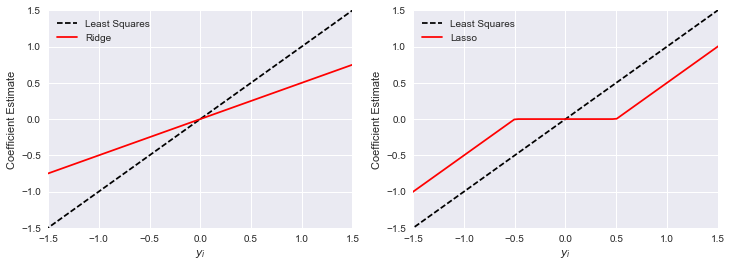

In [38]:
#figure 6.10

y = np.linspace(-2, 2, 100)
l = 1
lr_coef = y
rr_coef = y / (1+l)
ls_coef = np.zeros_like(y)
ls_coef[y>l/2] = y[y>l/2]-l/2
ls_coef[y<-l/2] = y[y<-l/2]+l/2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(y, lr_coef, '--k')
ax1.plot(y, rr_coef, '-r')
ax1.set(xlim=[-1.5, 1.5], ylim=[-1.5, 1.5], xlabel=r'$y_i$', ylabel='Coefficient Estimate')
ax1.legend(['Least Squares', 'Ridge'])

ax2.plot(y, lr_coef, '--k')
ax2.plot(y, ls_coef, '-r')
ax2.set(xlim=[-1.5, 1.5], ylim=[-1.5, 1.5], xlabel=r'$y_i$', ylabel='Coefficient Estimate')
ax2.legend(['Least Squares', 'Lasso']);

The figure above displays the situation. We can see that ridge regression and the lasso perform two very different types of shrinkage. In ridge regression, each least squares coefficient estimate is shrunken by the same proportion. In contrast, the lasso shrinks the least squares coefficient towards zero by a constant amount, $\lambda/2$. The least squares coefficients that are less than $\lambda/2$ are shunken entirely to zero. The type of shrinkage performed by the lasso in this simple setting is knows as *soft-thresholding*. 

### Bayesian Interpretation for Ridge Regression and the Lasso  
A Bayesian viewpoint for regression assumes that the coefficient vector $\beta$ has some *prior* distribution, say $p(\beta)$, where $\beta=(\beta_0, \beta_1, ..., \beta_p)^T$. The likelihood of the data can be written as $f(Y\lvert X, \beta)$ where $X=(X_1, ..., X_p)$. Multiplying the prior distribution by the likelihood gives us (up to a proportionality constant) the *posterior distribution*, which takes the form  

$$p(\beta\lvert X, Y)\propto f(Y\lvert X, \beta)p(\beta\lvert X)=f(Y\lvert X, \beta)p(\beta)$$  

where the proportionality above follows from Bayes' theorem, and the equality above follows from the assumption that $X$ is fixed.  

We assume the usual linear model,  

$$Y = \beta_0+X_1\beta_1+...+X_p\beta_p+\epsilon$$  

and suppose that the errors and independent and drawn from a normal distribution. Furthermore, assume that $p(\beta)=\prod_{j=1}^pg(\beta_j)$ for some density function $g$. It turns out that ridge regression and the lasso follow naturally from two special cases of g:  

  * If $g$ is a Gaussian distribution with mean zero and standard deviation a function of $\lambda$, then it follows that the *posterior mode* for \beta (the most likely value for $\beta$, given the data) is given by the ridge regression solution. (In fact, the ridge regression solution is also the posterior mean).  
  <br>
  * If $g$ is a double-exponential (Laplace) distribution with mean zero and scale parameter a function of $\lambda$, then it follows that the posterior mode for $\beta$ is the lasso solution. (However, the lasso solution is *not* the posterior mean, and in fact, the posterior mean does not yield a sparse coefficient vector).

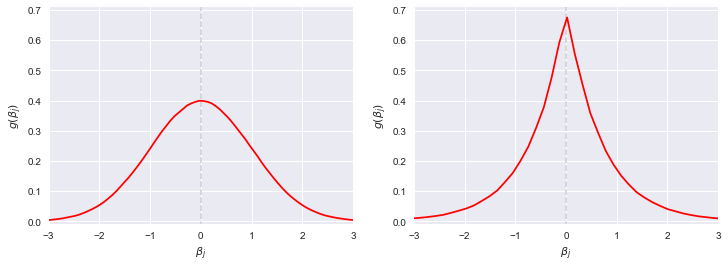

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

y1 = np.random.normal(size=1000000)
sns.distplot(y1, hist=False, ax=ax1, color='red')
ax1.vlines(0, -1, 1, linestyle='--', color='lightgray')
ax1.set(xlim=[-3, 3], ylim=[-0.01, 0.71], xlabel=r'$\beta_j$', ylabel=r'$g(\beta_j)$')


y2 = np.random.laplace(size=1000000, scale=0.7)
sns.distplot(y2, hist=False, ax=ax2, color='red')
ax2.vlines(0, -1, 1, linestyle='--', color='lightgray')
ax2.set(xlim=[-3, 3], ylim=[-0.01, 0.71], xlabel=r'$\beta_j$', ylabel=r'$g(\beta_j)$');

The gaussian and double-exponential priors are displayed in the figure above. From a Bayesian viewpoint, ridge regression and the lasso follow directly from assuming the usual linear model with normal errors, together with a simple prior distribution for $\beta$. Notice that the lasso prior is steeply peaked at zero, while the Gaussian is flatter and fatter at zero. Hence, the lasso expects a priori that many of the coefficients are (exactly) zero, while ridge regression assumes the coefficients are randomly distributed about zero.

## Selecting the Tuning Parameter
Implementing ridge regression and the lasso requires a method for selecting a value for the tuning parameter $\lambda$ or equivalently, the value of the constraint $s$. Cross-validation provides a simple way to tackle this problem. We choose a grid of $\lambda$ values, and compute the cross-validation error for each value of $\lambda$. We then select the tuning parameter value for which the cross-validation error is smallest. Finally, the model is re-fit using all of the available observations and the selected value of the tuning parameter.  

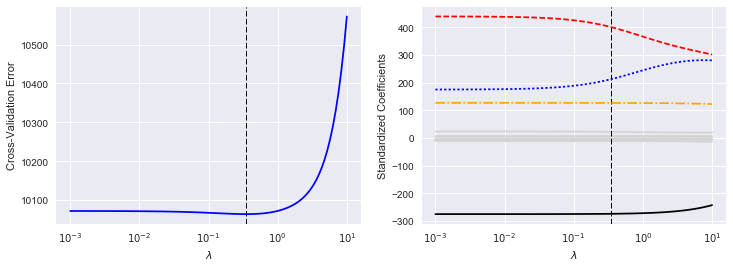

In [172]:
#Figure 6.12

from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Ridge

credit = pd.read_csv('../../data/Credit.csv', index_col=0)
credit = pd.get_dummies(credit, drop_first=True)
features = credit.columns.drop('Balance')
sc = StandardScaler()
credit[features] = sc.fit_transform(credit[features])

X = credit[features].values
y = credit['Balance'].values

alpha = np.logspace(-3, 1, 100)

ridge = Ridge()
loo = LeaveOneOut()

mse = []
coefs = []
for a in alpha:
    ridge.set_params(alpha=a)
    loo_mse = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        ridge.fit(X_train, y_train)
        y_pred = ridge.predict(X_test)
        loo_mse.append((y_test - y_pred)**2)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    mse.append(np.mean(loo_mse))
coefs = np.array(coefs)
mse = np.array(mse)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.semilogx(alpha, mse, color='blue')
min_ind = mse.argmin()
ax1_ylim = ax1.get_ylim()
ax1.vlines(alpha[min_ind], ax1_ylim[0], ax1_ylim[1], linestyle='dashed', color='k', linewidth=1)
ax1.set(ylim=ax1_ylim, xlabel=r'$\lambda$', ylabel='Cross-Validation Error')


for i in range(len(features)):
    if features[i] == 'Income':
        ax2.semilogx(alpha, coefs[:, i], '-k', label='Income')
    elif features[i] == 'Limit':
        ax2.semilogx(alpha, coefs[:, i], '--r', label='Limit')
    elif features[i] == 'Rating':
        ax2.semilogx(alpha, coefs[:, i], linestyle='dotted', color='blue', label='Rating')
    elif features[i] == 'Student_Yes':
        ax2.semilogx(alpha, coefs[:, i], '-.', color='orange', label='Student')
    else:
        ax2.semilogx(alpha, coefs[:, i], color='lightgray', zorder=1)
ax2_ylim = ax2.get_ylim()
ax2.vlines(alpha[min_ind], ax2_ylim[0], ax2_ylim[1], linestyle='dashed', color='k', linewidth=1)
ax2.set(ylim=ax2_ylim, xlabel=r'$\lambda$', ylabel='Standardized Coefficients');

The figure above displays the choice of $\lambda$ that results from performing LOOCV on the ridge regression fits from the credit data set. In this case the value of $\lambda$ is relatively small, indicating that the optimal fit only involves a small amount of shrinkage relative to the least squares solution. Also, the dip is not very pronounced, so there is a wide range of values that would give very similar error. In a case like this we might simply use the least squares solution.  

Using $k$-fold cross-validation with the lasso can distinguish *signal* from *noise* variables (i.e. predictors that are associated with the response and predictors that are not associated with the response). 

# Dimension Reduction Methods  
The methods discussed so far have controlled variance in two different ways, either by using a subset of the original variables, or by shrinking their coefficients toward zero. All of these methods are defined using the original predictors $X_1, X_2, ..., X_p$. We now explore a class of approaches that *transform* the predictors and then fit a least squares method using the transformed variables. We'll refer to these techniques as *dimension reduction* methods.  

Let $Z_1, Z_2, ..., Z_M$ represent the $M\lt p$ *linear combinations* of our original $p$ predictors. That is  

$$Z_m=\sum_{j=1}^p\phi_{jm}X_j$$  

for some constants $\phi_{1m}, \phi_{2m}, ..., \phi_{pm}$, $m=1, ..., M$. We can then fit the linear regression model  

$$y_i=\theta_0+\sum_{m=1}^M\theta_mz_{im}+\epsilon_i,\qquad i=1, ..., n$$  

using least squares. Note that the regression coefficients are given by $\theta_0, \theta_1, ..., \theta_M$. If the constants $\phi_{1m}, \phi_{2m}, ..., \phi_{pm}$ are chosen wisely, then such dimension reduction approaches can often outperform least squares regression.  

The term *dimension reduction* comes from the fact that this approach reduces the problem of estimating the $p+1$ coefficients $\beta_0, \beta_1, ..., \beta_p$ to the simpler problem of estimating the $M+1$ coefficients $\theta_0, \theta_1, ..., \theta_M$ where $M\lt p$.  

Notice that  

$$\sum_{m=1}^M\theta_mz_{im}=\sum_{m=1}^M\theta_m\sum_{j=1}^p\phi_{jm}x_{ij}=\sum_{j=1}^p\sum_{m=1}^M\theta_m\phi_{jm}x_{ij}=\sum_{j=1}^p\beta_jx_{ij}$$  

where  

$$\beta_j=\sum_{m=1}^M\theta_m\phi_{jm}$$  

Hence, $Z_m=\sum_{j=1}^p\phi_{jm}X_j$ can be thought of as a special case of the original linear regression model. Dimension reduction serves to constrain the estimated $\beta_j$ coefficients. This constraint on the form of the coefficients has the potential to bias the coefficient estimates. However, in situations where $p$ is large relative to $n$, selecting a value of $M \ll p$ can significantly reduce the variance of the fitted coefficients. If $M=p$, and all the $Z_m$ are linearly independent, then there will be no constraints. In this case, no dimension reduction occurs, so it's equivalent to performing least squares on the original $p$ predictors.  

All dimension reduction methods work in two steps. First, the transformed predictors $Z_1, Z_2, ..., Z_M$ are obtained. Second, the model is fit using these $M$ predictors. However, the choice of $Z_1, Z_2, ..., Z_M$, or equivalently, the selection of the $\phi_{jm}$\s can be achieved in different ways. We'll consider two approaches for this task: *principal components* and *partial least squares*.  

## Principle Components Regression  
*Principal component analysis* (PCA) is a popular approach for deriving a low-dimensional set of features from a large set of variables. 

### An Overview of Principal Component Analysis  
PCA is a technique for reducing the dimension of a $n\times p$ data matrix $\mathbf{X}$. The *first principal component* direction of the data is that along which the observations *vary the most*. 

<img src='../../figures/Chapter6/6.14.png' width='500', height='200' align='left'>

The figure above shows population size (pop) in tens of thousands of people, and ad spending for a particular company (ad) in thousands of dollars, for 100 cities. The green solic line represents the first principal component direction of the data. We can see that this is direction along which there is the greatest variability in the data. That is, if we *projected* the 100 observations onto this line, then the resulting projected observations would have the largest possible variance; projecting the observations onto any other line would yield projected observations with lower variance.  

The first principal component is displayed graphically above, but can be summarized mathematically by  

$$Z_1 = 0.839\times(pop-\overline{pop}) + 0.544\times(ad-\overline{ad})$$  

Here, $\phi_{11} = 0.839$ and $\phi_{21}=0.544$ are the principal component loadings which define the direction referred to above. The idea is that out of every possible *linear combination* of pop and ad such that $\phi_{11}^2 + \phi_{21}^2=1$, this particular linear combination yields the highest variance. It is necessary to consider only linear combinations of the form $\phi_{11}^2 + \phi_{21}^2=1$, since otherwise we could increase $\phi_{11}$ and $\phi_{21}$ arbitrarily to blow up the variance.  

Since $n=100$, pop and ad are vectors of length 100, and so is $Z_1$. For instance,  

$$z_{i1} = 0.839\times(pop_i-\overline{pop}) + 0.544\times(ad_i-\overline{ad})$$  

The values of $z_{11}, ..., z_{n1}$ are known as the *principal component scores*.  

There is also another interpretation for PCA: the first principal component vector defines the line that is *as close as possible* to the data. For instance, the first principal component line minimizes the sum of the squared perpendicular distances between each point and the line. When plotting the data with the first and second principal components as the $x$- and $y$-axis respectively, the *first principal component score* for the $i$th observation is the distance in the $x$-direction of the $i$th observation from zero.  

We can think of the vales of the principal component $Z_1$ as single number summaries of the joint pop and ad budgets for each location. If $z_{i1}=0.839\times (pop_i-\overline{pop})+0.544\times (ad_i-\overline{ad}) < 0$, this indicates a city with below average population size and below average ad spending, and vice versa with a positive number.  

In general, one can construct up to $p$ distinct principal components. The second principal component $Z_2$ is a linear combination of the variables that is uncorrelated with $Z_1$, and has largest variance subject to this constraint. It turns out that the zero correlation condition of $Z_1$ with $Z_2$ is equivalent to the condition tha the direction must be *perpendicular*, or *orthogonal* to the first principal component direction. The second principal component is given by  

$$Z_2=0.544\times(pop-\overline{pop})-0.839\times(ad-\overline{ad})$$

Since there are only two predictors in this data set, the first two principal components contain all of the information that is in pop and ad. However, by construction, the first component will contain the most information. the fact that the second principal component scores are much closer to zero indicates that this component captures far less information. 

### The Principal Components Regression Approach  
The *principal components regression* (PCR) approach involves constructing the first $M$ principal components $Z_1, ..., Z_m$, and then using these components as the predictors in a linear regression model that is fit with least squares. The idea being that often a small number of principal components suffice to explain most of the variability i the data, as well as the relationship with the response. In other words, we assume that *the directions in which $X_1, ..., X_p$ show the most variation are the directions that are associated with $Y$*. While this assumption is not always true, it often turns out to be a reasonable enough approximation to give good results.  

If the assumption underlying PCR holds, then fitting a least squares model to $Z_1, ..., Z_m$ will lead to better results than fitting a least squares model to $X_1, ..., X_p$, since most or all of the information in the data that relates to the response is contained in $Z_1, ..., Z_m$, and by estimating only $M\ll p$ coefficients we can mitigate overfitting. 

In a situation in which most or all of the $p$ predictors are associated with the response, PCR will not perform as well as ridge regression or the lasso, although it will perform better than least squares with the appropriate choice of $M$. The relatively worse performance of PCR is a consequence of the fact that many principal conponents are required in order to adequately model the response. On the other hand, PCR will tend to do well in cases when the first few principal components are sufficient to capture most of the variation in the predictors as well as the relationship with the response.  

Although PCR provides a simple way to perform regression using $M\lt p$ predictors, it is *not* a feature selection method. This is because each of the $M$ principal components used in the regression is a linear combination of all *p* of the *original* features. Therefore, while PCR often performs quite well in many practical settings, it does not result in the development of a model that relies upon a small set of the original features. In this sence, PCR is more closely related to ridge regression than to the lasso. One can even think of ridge regression as a continuous version of PCR!  

In PCR, the number of principal components, $M$, is typically chosen by cross-validation. When performing PCR, we generally recomment *standardizing* each predictor prior to generating the principal components. This ensures that all variables are on the same scale. Without standardization, high-variance variables will tend to play a larger role in the principal components obtained, and the scale on which the variables are measured will ultimately have an effect on the final PCR model. However, if the variables are all measured in the same units (say, kilograms or inches), then one might choose not to standardize them.  

The PCR approach involves identifying linear combinations, or *directions*, that best represent the predictors $X_1, ..., X_p$. these directions are identified in an *unsupervised* way, since the response $Y$ is not used to help determine the principal component directions (i.e. the response does not *supervise* the identification of the principal components). Consequently, PCR suffers from a drawback: there is no guarantee that the directions that best explain the predictors will also be the best directions to use for predicting the response. 

## Partial Least Squares  
*Partial least squares* (PLS) is a *supervised* alternative to PCR. Like PCR, PLS is a dimension reduction method, which first identifies a new set of features, $Z_1, ..., Z_M$ that are linear combinations of the original features, and then fits a linear model via least squares using these $M$ new features. But unlike PCR, PLS identifies these new features in a supervised way - that is, it makes use of the response $Y$ in order to identify new features that not only approximate the old features well, but also that *are related to the response*. Roughly speaking, the PLS approach attempts to find directions that help explain both the response and the predictors.  

To compute the first PLS direction, we begin by standardizing the $p$ predictors. PLS then computes the first direction by setting each $\phi_{j1}$ equal to the coefficient from the simple linear regression of $Y$ onto $X_j$. This coefficient is proportional to the correlation between $Y$ and $X_j$. Hence, computing $Z_1=\sum_{j=1}^p\phi_{j1}X_j$, PLS places the highest weight on the variables that are most strongly related to the response. While the PLS direction does not fit the predictors as closely as does PCA, it does a better job of explaining the response.  



